<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 07: Genetic algorithms**

## **Outline**

1. [Ejercicio 1. G.A. cost function](#eje1)
2. [Ejercicio 2. G.A. crossover function](#eje2)





In [ ]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-uis-student/talleres20211')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student/talleres20211


---
#### - Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.

---

# **Algoritmos Geneticos: Comunicación en una mesa redonda**


Un grupo de 300 personas de diferentes países se sienta en una mesa circular con 300 sillas. Cada persona sabe hablar dos idiomas (no necesariamente los mismos para todos). Los idiomas se codificarán de la siguiente manera:

*   0: Español
*   1: Inglés
*   2: Alemán
*   3: Francés
*   4: Portugués
*   5: Mandarín
*   6: Coreano
*   7: Noruego
*   8: Italiano
*   9: Persa
*   10: Árabe

Para este taller una mesa se codifica como un arreglo de 300 posiciones, y en cada posición (silla de la mesa) existe una lista de los dos posibles idiomas. Observe la siguiente ilustración.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20211/misc/mesaredonda01.png" />

Vamos a generar una **_buena_** solución para que se encuentre una disposición de las personas en la mesa de manera que cada persona pueda comunicarse con sus dos vecinos en la mesa.

- Tenga en cuenta que cada persona debe hablar dos idiomas **diferentes**. Es decir, si $(x_i, x_j)$ es la dupla de idiomas hablados por la persona, se tiene que cumplir que: $\enspace$ $x_i \neq x_j$

Para los siguientes puntos, la mesa redonda se simulará con el siguiente arreglo, donde cada solución es una permutación de los indices de la mesa. 

[228 226 274  28 245 285  73 240 239 272  14 157 136  42  33 200  83 110
 296 103 198 125 244 134 205 286 223 230  38  13  58 105  62 188 216 237
  55 145  75 250  68  79 120 189 139 243 262  36  21 129 137 289 190 159
  67 259 100 180 133 295 249 276  59 199 174 208 164 154 269 271  86 299
 211 144  85 109 147 111   6 153 266 293   3 209  99  31 257 252 177 179
  51  23 181   2 219 203 123 212 184 207 215  46  11 231 187 197  50 182
 183 255  72 282 102  17 297 170 227  66 151  53 140 118 108  30  71   8
  27  64 268 258 217   9  22 131  12  96 234  37 292 291  87 135  91 165
 173 176  93 284  90  98 101 119 152 206 113 117   7 254 214 273 148 256
  81  41 279  82 143 195 146 275  24 132  35 128 116 264  56  61  34 171
  43 150 106 236 142  57 235  47 221  32 161 178  44 202 246 158 233  45
 288 270 248 298 192 185  19  80   4 193 222 166  77 260 126 278 121 141
  49 169 196  60 155  39 294 238  92 265 115  97  29 172 138 204 280 130
  94 104  84 210 162 290 112  48 201 229 167 122 24

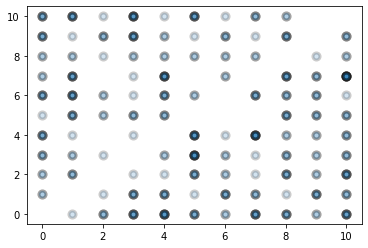

In [ ]:
#@title **code** codificación de la mesa y dos posibles soluciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Generamos 300 personas con sus dos idiomas hablados
mesa_redonda = np.array([[7,4],[4,9],[0,4],[2,9],[3,0],[5,9],[9,3],[3,1],[7,0],[5,0],[5,10],[6,1],[1,7],[6,1],[0,9],[1,6],[4,7],[0,10],[1,7],[5,3],[8,2],[7,4],[10,1],[4,7],[2,6],[3,10],[5,6],[2,6],[5,2],[2,0],[9,4],[7,1],[1,8],[8,7],[5,3],[8,2],[3,9],[4,1],[5,6],[10,7],[4,6],[0,5],[4,3],[10,8],[5,10],[3,6],[10,4],[8,2],[6,7],[9,1],[4,0],[6,8],[8,6],[2,9],[10,1],[10,5],[5,8],[2,3],[8,9],[4,8],[8,5],[8,9],[7,6],[10,0],[2,1],[7,4],[10,7],[7,4],[5,4],[4,8],[8,0],[6,3],[0,4],[2,5],[9,4],[10,9],[0,6],[4,7],[10,7],[10,5],[9,6],[1,5],[3,1],[7,0],[10,2],[5,0],[4,7],[2,8],[0,3],[6,0],[9,7],[10,3],[10,7],[9,6],[3,10],[1,5],[2,5],[4,6],[6,2],[1,6],[9,0],[10,2],[4,0],[8,0],[6,9],[10,8],[1,0],[7,1],[0,4],[2,0],[5,4],[4,1],[7,2],[8,7],[4,6],[10,2],[3,10],[7,0],[2,10],[8,5],[0,9],[4,3],[3,9],[9,5],[5,0],[3,8],[4,7],[1,6],[0,9],[1,3],[4,5],[8,9],[8,10],[10,4],[8,4],[9,3],[6,3],[8,10],[9,8],[3,0],[10,0],[0,10],[3,5],[10,3],[8,3],[5,3],[1,10],[4,0],[4,9],[5,3],[5,4],[3,0],[10,0],[4,5],[1,6],[6,4],[6,2],[0,3],[0,10],[0,7],[6,9],[9,5],[1,2],[7,6],[0,6],[7,6],[4,2],[3,7],[5,3],[4,7],[10,9],[3,10],[10,7],[7,8],[9,5],[1,2],[8,1],[5,10],[8,6],[0,4],[7,3],[6,9],[7,10],[9,2],[9,7],[8,5],[3,1],[9,7],[1,3],[10,2],[8,0],[3,0],[5,1],[3,5],[6,1],[6,1],[9,6],[7,1],[3,10],[8,2],[3,9],[5,2],[0,1],[0,9],[3,1],[5,4],[1,10],[5,3],[1,10],[1,5],[10,7],[10,7],[9,2],[8,7],[7,9],[6,7],[10,6],[0,1],[5,8],[7,8],[7,10],[8,9],[3,10],[5,3],[8,5],[3,9],[7,6],[1,6],[8,7],[5,4],[2,9],[7,10],[1,10],[0,8],[8,7],[10,0],[5,10],[3,0],[5,10],[10,5],[10,2],[8,0],[4,6],[10,3],[8,3],[7,4],[1,2],[9,1],[7,0],[1,7],[6,0],[10,7],[0,3],[6,8],[8,6],[1,10],[8,4],[5,2],[3,9],[0,6],[10,7],[0,2],[5,2],[0,6],[10,9],[1,7],[0,10],[5,0],[1,4],[10,4],[4,1],[3,2],[4,0],[9,0],[7,4],[4,0],[1,9],[4,1],[9,1],[1,8],[3,4],[5,4],[3,8],[4,0],[1,5],[3,5],[0,8],[10,1],[4,10],[1,7],[10,0],[2,0],[7,4],[0,7],[4,5],[9,1],[6,10],[8,3],[0,2],[7,0]])
n_personas = len(mesa_redonda)

plt.scatter(mesa_redonda[:,0], mesa_redonda[:,1], s=50, alpha=0.2, edgecolors="black", linewidths=3)

solucion1 = np.random.permutation(n_personas)
solucion2 = np.random.permutation(n_personas)

print(solucion1)
print(solucion2)

# **Inicializar población**  <a name="eje1"></a>

Podemos usar la misma función de inicialización vista en clase, teniendo en cuenta que la codificación de las soluciones se simplifica a mutaciones. Entonces usaremos la siguiente función


In [ ]:
#@title **code** generación de posibles formas de sentarse
def TSP_initialize_population1(n_individuals, n_personas):
    r = []
    for i in range(n_individuals):
        r.append(np.random.permutation(n_personas))
    return np.array(r)

# **Ejercicio 1. G.A. cost function**  <a name="eje1"></a>

Complete la función de costo ````TSP_cost1```` para ponderar cada solución teniendo en cuenta el número de vecinos que pueden hablarse, de la siguiente manera:

- Si no es posible hablar el mismo idioma que ambos vecinos, la función de costo debe incrementar 100 unidades.
- De lo contrario, la función de costo debe incrementar solamente 1 unidad.
- Tenga en cuenta los índices que corresponden a la primera posición (índice 0) y a la última posición (índice 299) son considerados **VECINOS**.


**Recomendación:** para simplificar el problema, valide que CUALQUIERA de los dos idiomas hablados por la persona SIGUIENTE, sea el mismo que CUALQUIERA de los dos idiomas que habla la persona actual.



In [ ]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas

def TSP_cost1(personas, solution):
    costo = 0
    sol_personas = personas[solution]
    if sol_personas[0][0] in sol_personas[299] or sol_personas[0][1] in sol_personas[299]:
      costo += 1
    for i in range(sol_personas.shape[0]-1):
      if sol_personas[i][0] in sol_personas[i+1] or sol_personas[i][1] in sol_personas[i+1]:
        costo += 1
      else:
        costo +=100
  
    return costo



import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(TSP_cost1))

In [ ]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_1 $src1

evaluation result CORRECT


# **Ejercicio 2. G.A. crossover function**  <a name="eje2"></a>

Ahora vamos a generar una función de crossover que obtenga **cuatro hijos** por cada pareja de soluciones que se ingresan, utilizando la configuración descrita en la figura: 


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20211/misc/mesaredonda02.png" />

In [ ]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas

def TSP_cross_over_1(solution1, solution2):
    l = len(solution1)
    fp = int(l*0.2)
    stard1 = solution1[:fp]
    end1 = solution1[-fp:]
    stard2 = solution2[:fp]
    end2 = solution2[-fp:]
    r = np.zeros((4,l))
    r[0,:fp] = stard1
    r[1,:fp] = stard2
    r[2,:fp] = end1
    r[3,:fp] = end2
    c = fp
    for i in range(l):
      if not solution2[i] in stard1:
        r[0][c]=solution2[i]
        c += 1
    c = fp
    for i in range(l):
      if not solution1[i] in stard2:
        r[1][c]=solution1[i]
        c += 1
    c = fp
    for i in range(l):
      if not solution2[i] in end1:
        r[2][c]=solution2[i]
        c += 1
    c = fp
    for i in range(l):
      if not solution1[i] in end2:
        r[3][c]=solution1[i]
        c += 1



    return r[0], r[1], r[2], r[3]


#Colaboratory
import urllib.parse, inspect
src2 = urllib.parse.quote_plus(inspect.getsource(TSP_cross_over_1))

In [ ]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_2 $src2

(array([ 2., 11.,  0.,  8., 16., 18., 13.,  7., 15.,  3., 14.,  1.,  5.,
        4., 10.,  6., 12., 17.,  9., 19.]), array([16., 18., 13.,  7.,  2., 11.,  0.,  8.,  9.,  6., 19., 14., 10.,
        4.,  5., 15.,  1.,  3., 17., 12.]), array([13.,  3., 17., 12., 16., 18.,  7., 15., 14.,  1.,  5.,  4., 10.,
        6.,  2., 11.,  9., 19.,  8.,  0.]), array([ 9., 19.,  8.,  0.,  2., 11.,  7., 16., 18.,  6., 14., 10.,  4.,
        5., 15.,  1., 13.,  3., 17., 12.]))
(array([ 2., 11.,  0.,  8., 16., 18., 13.,  7., 15.,  3., 14.,  1.,  5.,
        4., 10.,  6., 12., 17.,  9., 19.]), array([16., 18., 13.,  7.,  2., 11.,  0.,  8.,  9.,  6., 19., 14., 10.,
        4.,  5., 15.,  1.,  3., 17., 12.]), array([13.,  3., 17., 12., 16., 18.,  7., 15., 14.,  1.,  5.,  4., 10.,
        6.,  2., 11.,  9., 19.,  8.,  0.]), array([ 9., 19.,  8.,  0.,  2., 11.,  7., 16., 18.,  6., 14., 10.,  4.,
        5., 15.,  1., 13.,  3., 17., 12.]))
evaluation result CORRECT


In [ ]:
#@title **Verifique su solución**

sol1 = np.random.permutation(20)
sol2 = np.random.permutation(20)
print(sol1)
print(sol2)


hijos = TSP_cross_over_1(sol1, sol2)
print(hijos[0])
print(hijos[1])
print(hijos[2])
print(hijos[3])

[14  9  0 11 18 15 17  6  3  8 16 13 12 10  7  4 19  1  5  2]
[16  0  9  1  6 10 15 14  2 13 17 12  4 19  3  5 18  7 11  8]
[14.  9.  0. 11. 16.  1.  6. 10. 15.  2. 13. 17. 12.  4. 19.  3.  5. 18.
  7.  8.]
[16.  0.  9.  1. 14. 11. 18. 15. 17.  6.  3.  8. 13. 12. 10.  7.  4. 19.
  5.  2.]
[19.  1.  5.  2. 16.  0.  9.  6. 10. 15. 14. 13. 17. 12.  4.  3. 18.  7.
 11.  8.]
[18.  7. 11.  8. 14.  9.  0. 15. 17.  6.  3. 16. 13. 12. 10.  4. 19.  1.
  5.  2.]


Teniendo en cuenta la codificación del problema, podemos usar las funciones de mutación que vimos en clase.

In [ ]:
#@title **code** mutation
def TSP_mutate1(solution, mutation_prob):
    mutated_solution = np.copy(solution)
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            j = i+1 if i!=len(solution)-1 else 0
            tmp = mutated_solution[i]
            mutated_solution[i] = mutated_solution[j]
            mutated_solution[j] = tmp
    return mutated_solution

Finalmente, observe el funcionamiento del algoritmo genético:

  0%|          | 0/1500 [00:00<?, ?it/s]

Orden de los indices [160  97  50 120 218 206  93 212  96  41  56  54  49 192 130 268  64 266
 224 271  39  77 197 128 241 178  51  59 270 269 114  28 226  78 211 190
  34 229 182 293 210 171 129  86 274 123 295 279  31  65 116  79 118 230
 292   9 174 225  81  68  72 247 165 291   2  74 228 132   4  42 285 236
  48  18 208  84 105 251 255 107 194  38  27 113 200 280 150  13  76 179
 168 125 173  24 281 283   1 122 170 106 254  40  90 187 248 153  19 191
 272 201 119 278 276 185 101  91 235  22  99 242 250 298 141  88 161 244
  82  37 288 196 262  25  66  23  61  47 246 284 149 243   6  15 155  30
  36 297 145 139 193  16 184 146 204 167 143 177 290  35 134 275  14 164
 249 277 273 138 256  87 234 126 133  92 282 195  80  21 260 112   3  57
 163  45  94 232 216 263 221 214 264 148 181  20  85  89 261  29  98 156
 215  67   7 267   5 104  26 239 231 152 144 180 237 140  62  12  32 137
 127 252 135 199 296  52  70  63 115  17 147 238 142 294  60 209 162 188
 108 245 219 253  33   8 157 1

<Figure size 432x288 with 0 Axes>

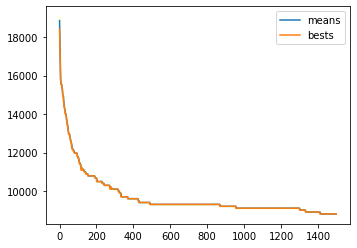

In [ ]:
#@title **verifique su respuesta**
import numpy as np

def TSP_plot_GA_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plot_evolution(bests, means, stds)


%run ga4.py

r = run_ga(pop_size=10, 
               init_population_function = lambda x: TSP_initialize_population1(x, n_personas), 
               mutation_function        = TSP_mutate1, 
               crossover_function       = TSP_cross_over_1,
               cost_function            = lambda x: TSP_cost1(mesa_redonda, x), 
               crossover_prob           = 0.001,
               mutation_prob            = 0.001, 
               n_iters                  = 1500)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)
print("Orden de los indices", best)
print("Secuencia en la que se deben sentar las personas \n", mesa_redonda[best].tolist())

<br><br><br><br>

# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_std_07_20211" #@param {type:"string"}
codigo_name = "tl7_2173051" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

Taller_std_07_20211 tl7_2173051


In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>